Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Firstname Lastname | 01234567 | 07.02.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 7 &ndash; Tricks of the Trade</h2>

<b>Authors:</b> Schlüter, Rumetshofer, Schörgenhumer<br>
<b>Date:</b> 24-01-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [2]:
# Required packages and the u7_utils file
import u7_utils as u7
from pathlib import Path
import torch

# Exercise 1

- Open the lecture notebook (`U7.ipynb`) and go through "Step 1: Creating the dataset". If you are short of ideas on image classes, food items or comic book characters usually work well. If you run into problems creating the required .csv files that you cannot fix within 5 minutes, use the provided `burgers_and_burritos`, `bridge_and_tower` or `dog_and_wolf` dataset, and only go through the "Download images" steps. Once done, switch back to this notebook.

- Load the dataset that you created, reserving 20% for validation, and enabling data augmentation.

- Plot 9 example images in 3 rows.

**1.1. Specify the path and download the images. Create a dataset with 20% for validation.**

In [51]:
dataset_name = "cat_and_lion"
dataset_path = Path(f"resources/{dataset_name}")
dataset_path.mkdir(parents=True, exist_ok=True)
u7.download_all_images(dataset_path)
dataset = u7.load_image_dataset(
    dataset_path,
    valid_size=0.2,  # keep 20% for validation
    batch_size=32,   # reduce if you run out of RAM
    augment=True     # whether to use augmentation
)

ignored 30 'cat' images because they already exist


ignored 43 'lion' images because they already exist


**1.2. Plot example images.**

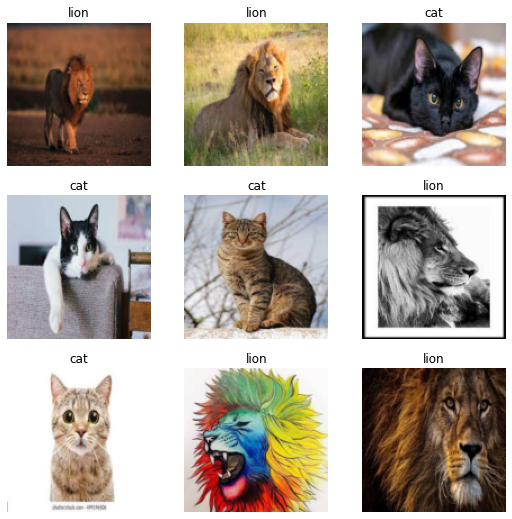

In [52]:
u7.plot_image_dataset(dataset_path, nitems=9, nrows=3, size=128)


# Exercise 2

- Using `u7.create_cnn()`, create a *pretrained* CNN with 18 layers and the number of classes set according to your dataset (the other settings do not matter). Store the model in a variable called `model`.

- Plot the weights of the first layer (*this is already done for you*).

**2.1. Create the specified CNN.**

In [53]:

model = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=False,   # whether to use batch normalization
    dropout=0,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=False,   # whether to use residual connections
    pretrained=True   # whether to use pretrained weights
)
losses = []  # collect losses for this model in the training step below
loss = torch.nn.functional.cross_entropy



**Plot the weights of the first layer (already done, only need to execute the cell).**

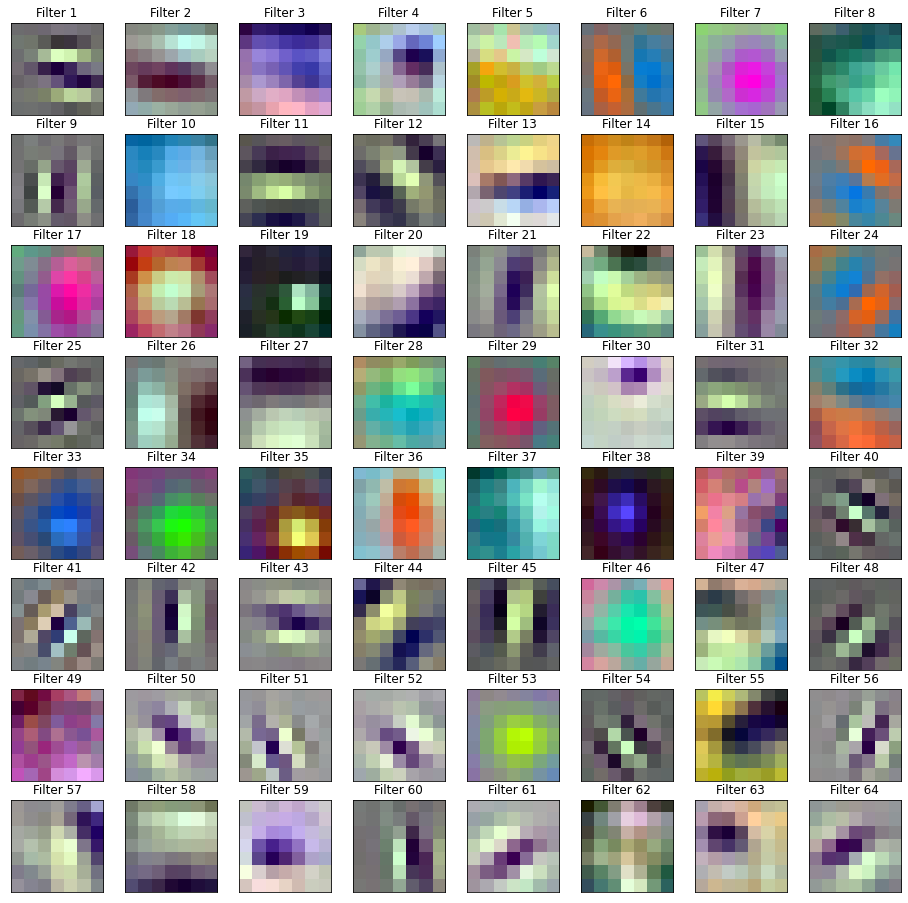

In [40]:
weights = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

# Exercise 3

Using the dataset that you loaded in Exercise 1, perform the following tasks:

- Set the random seed to 23, then create a CNN with 18 layers, no dropout, no batch normalization, no residuals, and no pretraining, using `u7.create_cnn()`

- Plot and keep a copy of the weights of the first layer (stored in variable `weights_before_training`).

- Train the model for 4 iterations, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using `u7.run_gradient_descent()`

- Plot and keep a copy of the weights of the first layer again (stored in variable `weights_after_training`).

- Compare the filters plotted before and after training. Do you see any difference?

- Print the absolute difference of the weights before and after training *(this is already done for you)*

**3.1. Set the random seed and create the specified CNN.**

In [57]:
u7.set_seed(23)
model = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=False,   # whether to use batch normalization
    dropout=0,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=False,   # whether to use residual connections
    pretrained=False   # whether to use pretrained weights
)
losses = []  # collect losses for this model in the training step below
loss = torch.nn.functional.cross_entropy
u7.set_seed(42)  # reset seed

**3.2. Plot the weights of the first layer and store them in a variable called `weights_before_training`.**

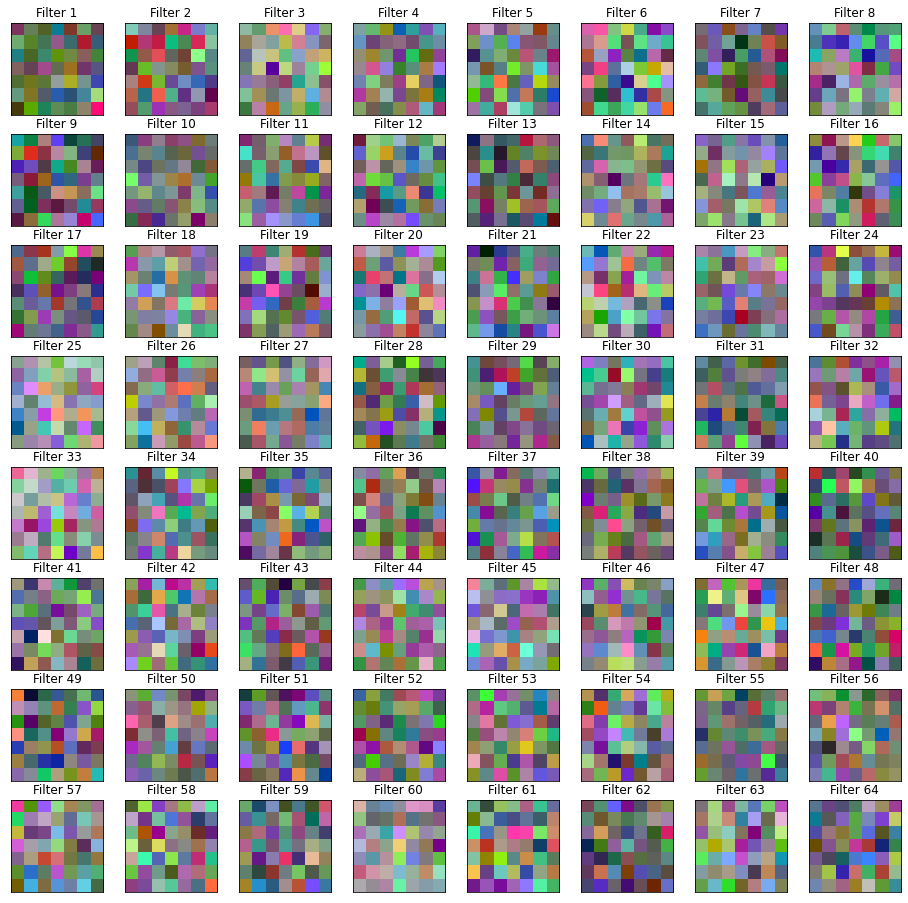

In [58]:
weights_before_training =u7.visualize_cnn_filters(model, ncols=8, image_size=2)

**3.3. Train the model using the specified settings.**

In [59]:
u7.set_seed(23)
losses.append(u7.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=4,         # number of epochs
    learning_rate=0.005,  # base learning rate
    momentum=0.9,         # base momentum
    lr_schedule=None,     # try "linear", "onecycle", "steps"
    plot_curves=False
))

  0%|          | 0/59 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.684980 and validation loss: 0.686003
Epoch  2 finished with training loss: 0.683262 and validation loss: 0.684317
Epoch  3 finished with training loss: 0.678684 and validation loss: 0.683114
Epoch  4 finished with training loss: 0.680256 and validation loss: 0.681917


**3.4. Plot the weights of the first layer again and store them in a variable called `weights_after_training`.**

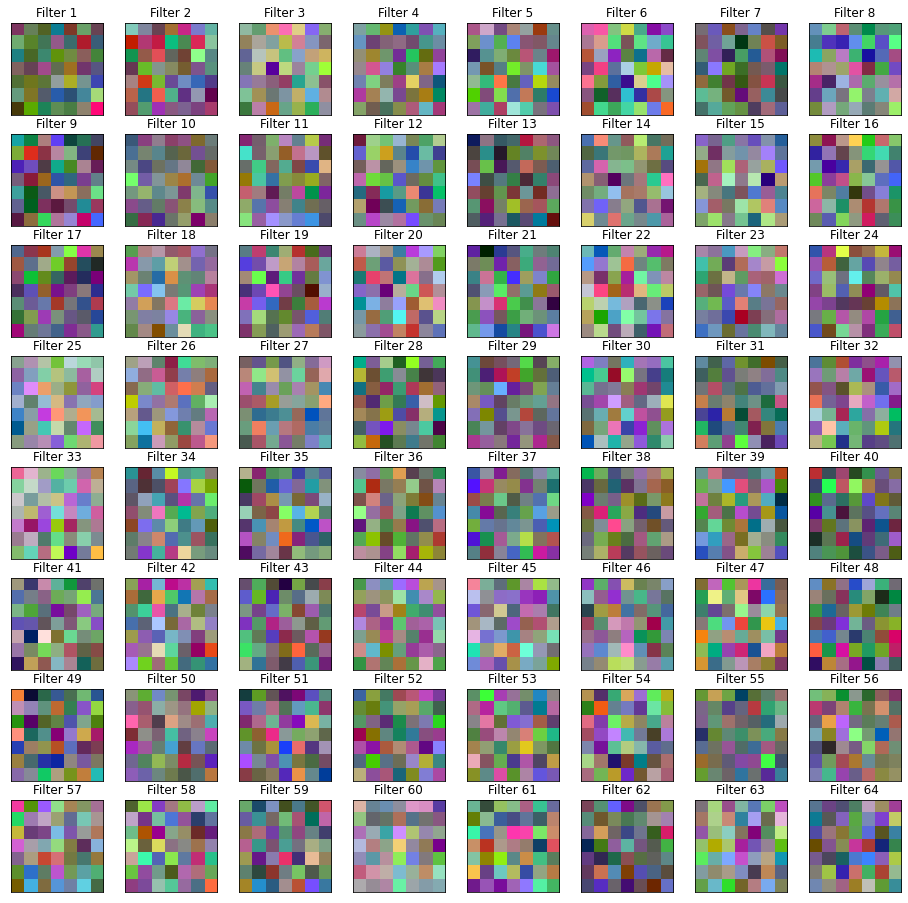

In [60]:
weights_after_training =u7.visualize_cnn_filters(model, ncols=8, image_size=2)

**3.5. Do you see any difference? Did the filters change visibly during training?**

I can see that the first set of filters is a little bit more lighter than the first one.

**Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.**

In [61]:
(weights_before_training - weights_after_training).abs().sum().item()

0.9841516613960266

# Exercise 4

Similar to before, perform the following tasks:

- Set the random seed to 23, then create a CNN with 18 layers, no dropout, **with** batch normalization, **with** residuals, and no pretraining, using `u7.create_cnn()`

- Plot and keep a copy of the weights of the first layer (stored in variable `weights_before_training`).

- Train the model for 4 iterations, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using `u7.run_gradient_descent()`

- Plot and keep a copy of the weights of the first layer again (stored in variable `weights_after_training`).

- Compare the filters plotted before and after training. Do you see any difference?

- Print the absolute difference of the weights before and after training *(this is already done for you)*

**4.1. Set the random seed and create the specified CNN (with batchnorm and residuals).**

In [62]:
u7.set_seed(23)
model = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=True,   # whether to use batch normalization
    dropout=0,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=True,   # whether to use residual connections
    pretrained=False   # whether to use pretrained weights
)
losses = []  # collect losses for this model in the training step below
loss = torch.nn.functional.cross_entropy
u7.set_seed(42)  # reset seed

**4.2. Plot the weights of the first layer and store them in a variable called `weights_before_training`.**

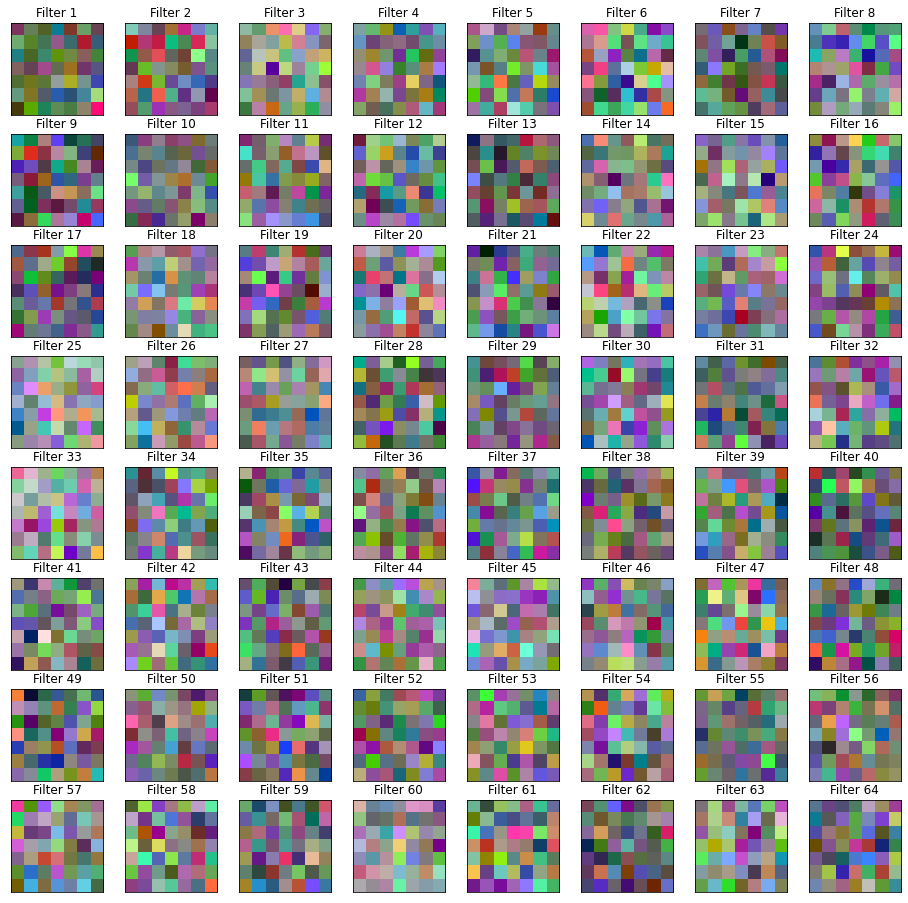

In [63]:
weights_before_training =u7.visualize_cnn_filters(model, ncols=8, image_size=2)

**4.3. Train the model using the same specified settings.**

In [64]:
losses.append(u7.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=4,         # number of epochs
    learning_rate=0.005,  # base learning rate
    momentum=0.9,         # base momentum
    lr_schedule=None,     # try "linear", "onecycle", "steps"
    plot_curves=False
))

  0%|          | 0/59 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.683597 and validation loss: 0.701968
Epoch  2 finished with training loss: 0.669512 and validation loss: 0.702763
Epoch  3 finished with training loss: 0.673251 and validation loss: 0.681939
Epoch  4 finished with training loss: 0.623140 and validation loss: 0.734054


**4.4. Plot the weights of the first layer again and store them in a variable called `weights_after_training`.**

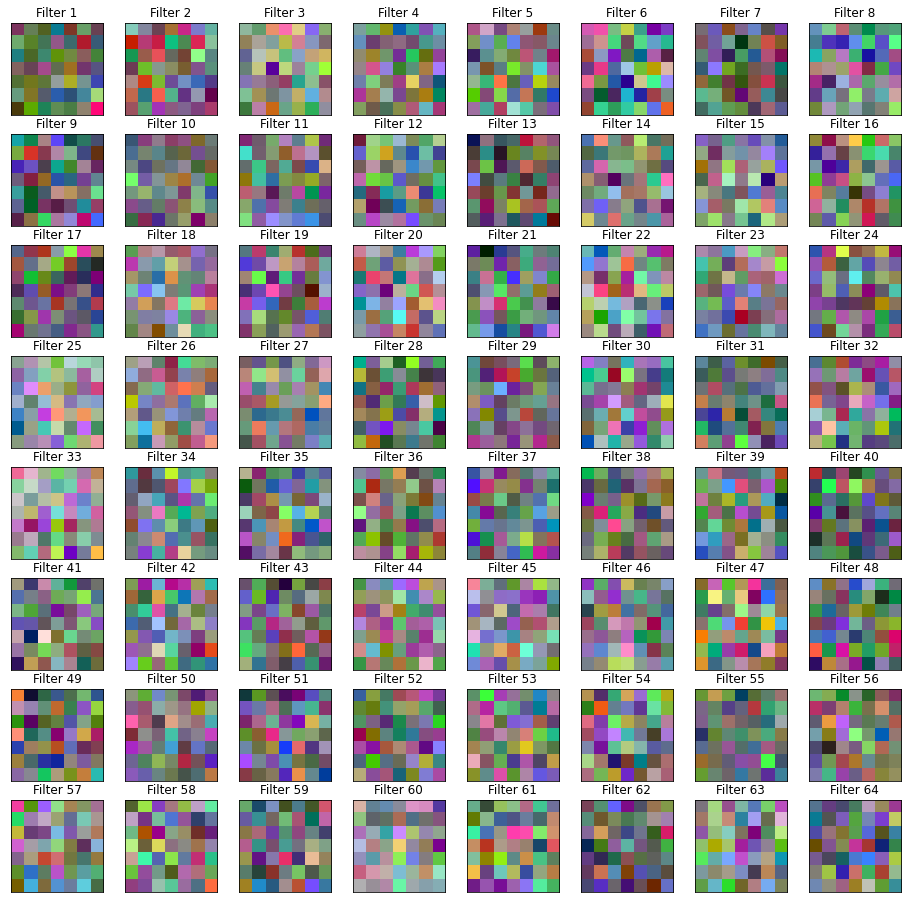

In [65]:
weights_after_training =u7.visualize_cnn_filters(model, ncols=8, image_size=2)

**4.5. Do you see any difference now? Did the filters change visibly during training?**

I can see that the first set of filters seems brighter than the first one.

**Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.**

In [66]:
(weights_before_training - weights_after_training).abs().sum().item()

15.649006843566895